These are all the libraries we need to load in

In [21]:
2# Install RDKit on colab
# %%capture
!pip install rdkit-pypi
# SNFG : system for nomenclature for glycans
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np
import os
import difflib
import io
import pandas as pd
from rdkit.Chem import rdFMCS
IPythonConsole.ipython_useSVG=False

!pip install pubchempy
import pubchempy as pubchem

from pathlib import Path
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

import shutil
# !pip install pychem
import json
import csv

print(os.getcwd())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [22]:
print(os.getcwd())

/content


This is loading in the csv file of Galectin Inhibitors


In [23]:
from google.colab import files
uploaded = files.upload()


Saving Galectin Inhibitors-RD2.csv to Galectin Inhibitors-RD2 (1).csv


Opening the CSV File


In [24]:
def detect_delimiter(csv_file):
    with open(csv_file, 'r') as f:
        dialect = csv.Sniffer().sniff(f.read(1024))  # Read the first 1024 bytes to detect the delimiter
    return dialect.delimiter

# input the name of the CSV file from the previous step in the variable below
csv_file_path = 'Galectin Inhibitors-RD2.csv'
delimiter = detect_delimiter(csv_file_path)
print("Detected delimiter:", delimiter)

Detected delimiter: ,


In [25]:
# input the name of the CSV file from the previous step in the variable below
data = pd.read_csv(csv_file_path, sep = delimiter)

test_list = []
# print(data['SMILES String'])
for i in set(data['SMILES String']):
  test_list.append(i)

print("Test List:", test_list)
print("Length of unique smile strings",len(test_list)) # unique smile strings





Test List: ['CC1=CC=C(C=C1)C(=O)N[C@H]2[C@H]([C@H](O[C@H]([C@@H]2OP(=O)(O)O)SC)CO)O', 'CC1=CC=C(C=C1)C(=O)N[C@H]2[C@H]([C@H](O[C@H]([C@@H]2OS(=O)(=O)O)SC)CO)O', 'COC(=O)C1=CN(N=N1)[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)SC)CO)O', 'CC1=CC=C(C=C1)S(=O)(=O)/N=C\\2/C(=CC3=CC=CC=C3O2)CO[C@H]4[C@H]([C@H](O[C@@H]([C@@H]4O)OC)CO)O', 'COCCNC(=O)C1=CN(N=N1)[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)S[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)CO)O)N4C=C(N=N4)C(=O)NCCOC)O)CO)O', 'C1=CC(=CC(=C1)O)C2=CN(N=N2)[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)S[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=CC=C6)O)O)CO)O', 'CC1=CC=C(C=C1)C(=O)O[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)S[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)CO)O)OC(=O)C4=CC=C(C=C4)C)O)CO)O', 'C1=CC(=C(C=C1O[C@@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC(=C(C(=C4)F)F)F)O)Cl)Cl', 'CC1=CC=C(C=C1)C(=O)N[C@H]2[C@H]([C@H](O[C@H]([C@@H]2OC(=O)C)SC)CO)O', 'CC1=CC=C(C=C1)S[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC(=C(C=C4)F)F)O', 'C1=CC=C(C=C1)CCNC(=O)C2=CN(N=N2)[

IF NOT SORTING: Here is drawing the molecules


/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


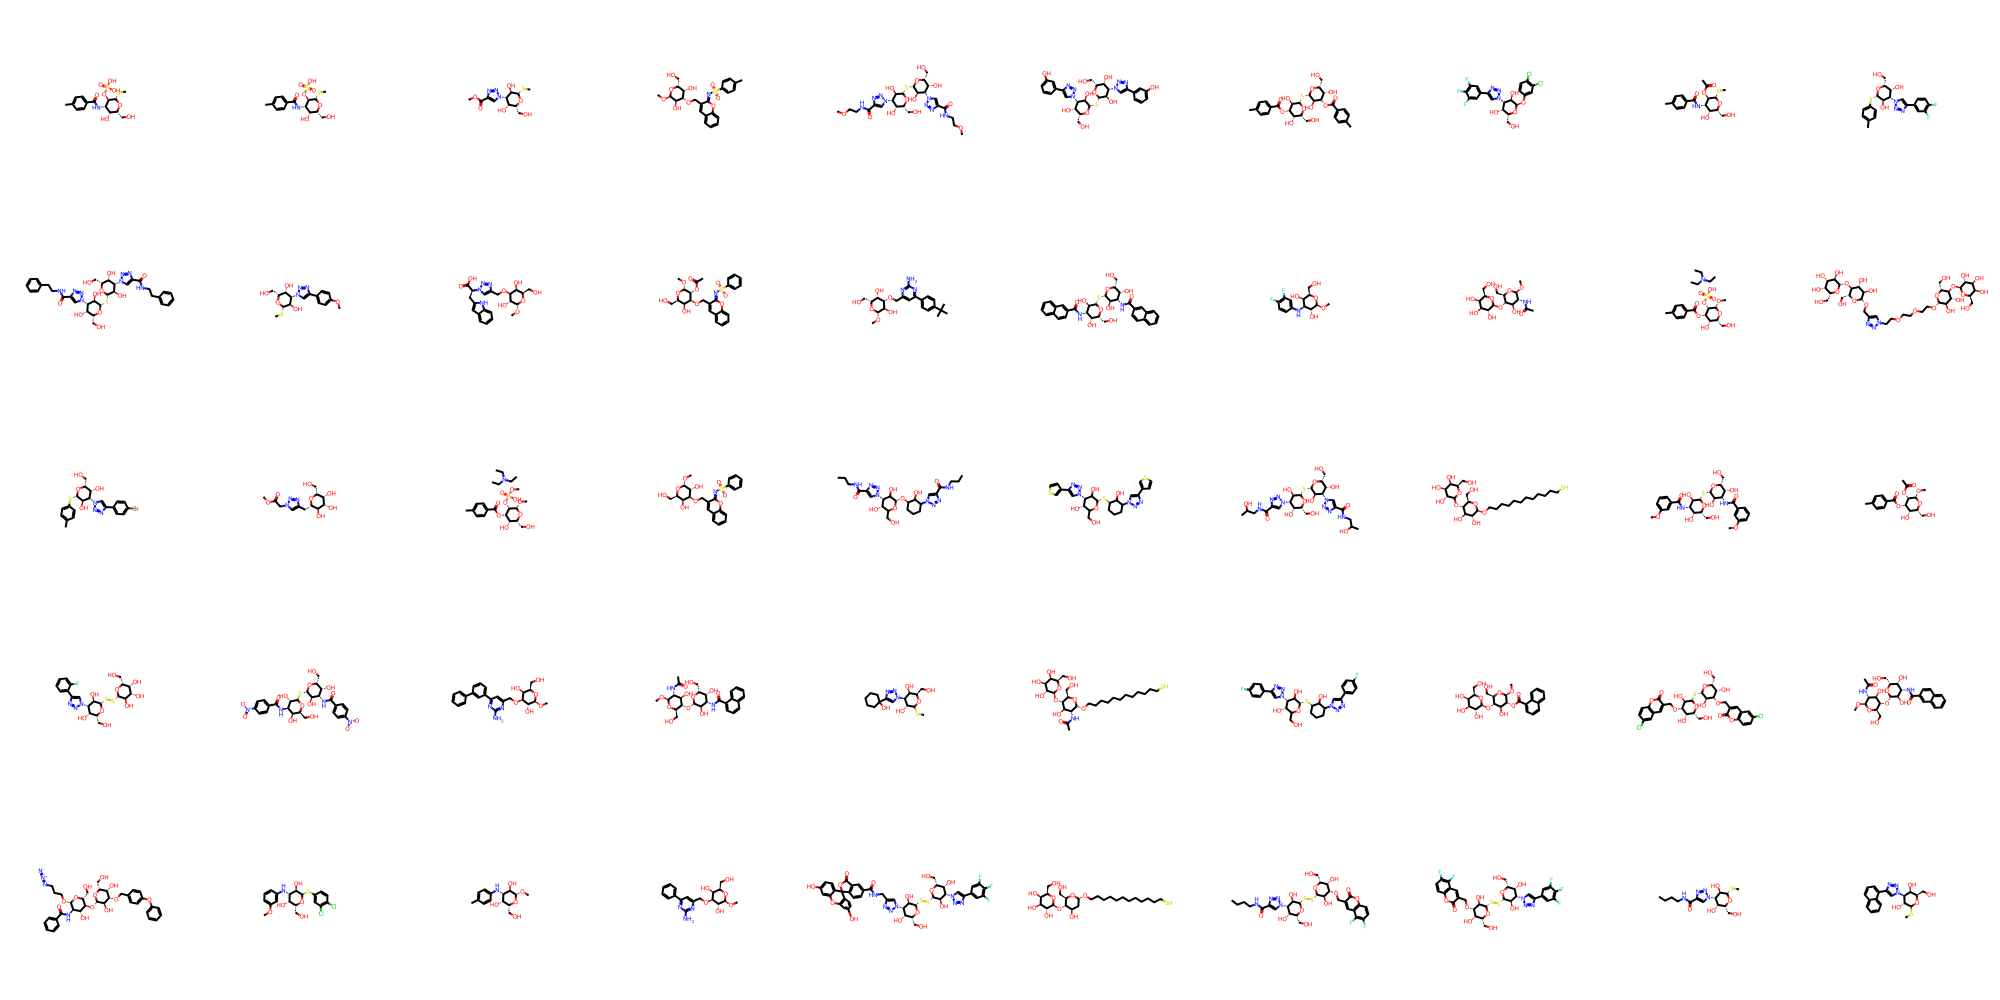

In [26]:
ms = [Chem.MolFromSmiles(x) for x in test_list]
# print(ms)
# for i in data4:
#   print(i)
Draw.MolsToGridImage(ms, molsPerRow=10)

Creating JSON


In [27]:
data = pd.read_csv(csv_file_path, sep = delimiter )

unique_compounds = set(data['SMILES String'])

smileCIDkv = {}

for smiles in unique_compounds:
  smileCIDkv[smiles] = data.loc[data['SMILES String'] == smiles, 'PubChem CID'].values.tolist()[0]

# kv of smile strings and cid
print(smileCIDkv)
print('Unique Compounds:',len(smileCIDkv))




{'CC1=CC=C(C=C1)C(=O)N[C@H]2[C@H]([C@H](O[C@H]([C@@H]2OP(=O)(O)O)SC)CO)O': 24776272, 'CC1=CC=C(C=C1)C(=O)N[C@H]2[C@H]([C@H](O[C@H]([C@@H]2OS(=O)(=O)O)SC)CO)O': 24776270, 'COC(=O)C1=CN(N=N1)[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)SC)CO)O': 11652651, 'CC1=CC=C(C=C1)S(=O)(=O)/N=C\\2/C(=CC3=CC=CC=C3O2)CO[C@H]4[C@H]([C@H](O[C@@H]([C@@H]4O)OC)CO)O': 118707319, 'COCCNC(=O)C1=CN(N=N1)[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)S[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)CO)O)N4C=C(N=N4)C(=O)NCCOC)O)CO)O': 52941211, 'C1=CC(=CC(=C1)O)C2=CN(N=N2)[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)S[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=CC=C6)O)O)CO)O': 71562125, 'CC1=CC=C(C=C1)C(=O)O[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)S[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)CO)O)OC(=O)C4=CC=C(C=C4)C)O)CO)O': 25179327, 'C1=CC(=C(C=C1O[C@@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC(=C(C(=C4)F)F)F)O)Cl)Cl': 122443490, 'CC1=CC=C(C=C1)C(=O)N[C@H]2[C@H]([C@H](O[C@H]([C@@H]2OC(=O)C)SC)CO)O': 24776274, 'CC1=CC=C(C=C1)S[C@H]2[C@@H]([C@H]([C@H](

In [28]:
# draw using the smile and generate name using the cid
def drawAndName(dictio):
  for smiles, cid in dictio.items():
    # # print(keys)
    # print(values)
    # https://drive.google.com/drive/folders/15VEmN0U9OO-TYG8ijPMhKXah0nFv7sYn?usp=share_link

    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol)
    img.thumbnail((200,200))


    img_name = os.path.join('/content', f'{cid}.png')
    # print(img_path)
    img.save(img_name)

    !cp "{img_name}" "/content/drive/MyDrive/DerdaLabComputing/ForRatmir/unsorted_StructureImages"

# https://drive.google.com/drive/folders/1-CAqlTdi2dbhOeGenAiu26xZovVdvXhX?usp=share_link

  # for smiles in dictio.values():
  #   print(smiles)


drawAndName(smileCIDkv)

In [29]:
print(len(smileCIDkv))

json_data = json.dumps(smileCIDkv, indent=50)
# print(json_data)

# Set the file path and name
file_path = '/content/drive/MyDrive/DerdaLabComputing/ForRatmir/unsorted_json/'
file_name = 'SmileCID_dict.json'

# Write the JSON data to a file
with open(file_name, 'w') as f:
    f.write(json_data)

# Copy the file to Google Drive
!cp $file_name $file_path

194
